# Imports

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import xarray as xr

import missingno as msgn

### Local imports

In [91]:
from project import *

# Intro

# Data Loading & Prep

In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/ChilesheChanda/resource-datasets/master/churn_rate/churn-bigml-80.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [93]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Exploration (EDA)

In [94]:
df.isna().sum().sum() # check for missing values

0

In [95]:
df.Churn.value_counts() #check how many ppl churned

False    2278
True      388
Name: Churn, dtype: int64

In [96]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
        
binary_cols # categorical figures w more than 2 classes

['International plan', 'Voice mail plan', 'Churn']

In [97]:
multiple_cols_cat = []
for col in columns:
    if df[col].value_counts().shape[0] > 2:
        multiple_cols_cat.append(col)
        
multiple_cols_cat # categorical figures w multiple classes

['State',
 'Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

<AxesSubplot:xlabel='Churn', ylabel='count'>

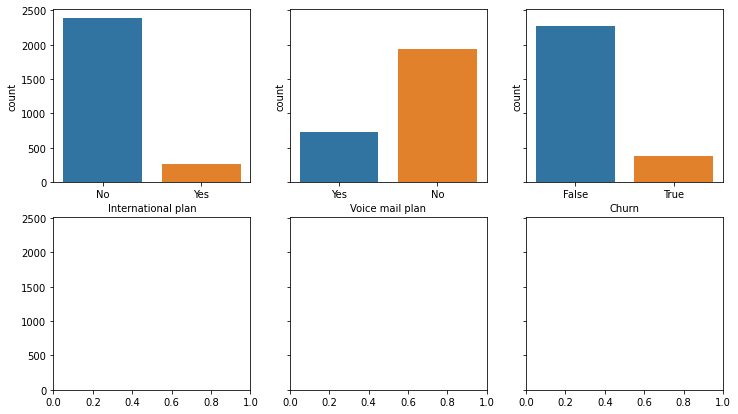

In [98]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("International plan", data=df, ax=axes[0,0])
sns.countplot("Voice mail plan", data=df, ax=axes[0,1])
sns.countplot("Churn", data=df, ax=axes[0,2])

In [105]:
df[['International plan','Churn']].groupby(['International plan']).mean() # How churn rates are diff between ppl w int plan vs without

,Churn
International plan,
No,0.112688
Yes,0.437037


In [107]:
df[['Voice mail plan','Churn']].groupby(['Voice mail plan']).mean() # How churn rates are diff between ppl w int plan vs without

,Churn
Voice mail plan,
No,0.167098
Yes,0.088677


In [108]:
table = pd.pivot_table(df, values='Churn', index=['International plan'],
                    columns=['Voice mail plan'], aggfunc=np.mean)
table

Voice mail plan,No,Yes
International plan,,
No,0.134638,0.054711
Yes,0.456410,0.386667


# Model Development

# Model Evaluation & Testing

# Conclusion